## Data Exploratory Analysis of Telecom Users Data

## Task 1

### Data Cleaning, Transformations and Feature Extractions.

#### User Overview analysis


## Steps Involved

### Step 1: Importing necessary and initial Packages and Loading Data

In [3]:
# Importing necessary packages for data loading and initial visualizations
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading data 
pd.set_option('max_column', None)
loaded_data = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?', None])
loaded_data.head() # Print the head sample of the Data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Displaying the column names

In [5]:
# Showing the number of column and their names
print("The Total Number of Columns are: ",len(loaded_data.columns.tolist())) 
loaded_data.columns.tolist()


The Total Number of Columns are:  55


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

### Step 2: Showing the Data Metrics

#### Size of the Data, and other related metrics, like Data types of each column

In [6]:
# number of data points
print(f" There are {loaded_data.shape[0]} rows and {loaded_data.shape[1]} columns of Telecom Users Data")
print("Shape of the Data",loaded_data.shape)
print("------------ Data Type of each Column----------------")
print("")
loaded_data.info()

 There are 150001 rows and 55 columns of Telecom Users Data
Shape of the Data (150001, 55)
------------ Data Type of each Column----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI              

### Step 3: Handling Missing Values

#### Showing the number and percentage of missing Values

In [7]:
# Percentage % of total missing values in the dataset

def total_percent_missing_data(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains a Total of ", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

total_percent_missing_data(loaded_data)

The Telecom dataset contains a Total of  12.5 % missing values.


In [8]:
# Column(s) that has missing values

total_no_data_per_column = loaded_data.shape[0]-1 # Total number of rows in every column
print(" ")

# printing the number of Missing data per column
item_list = []
row_list = []
i=0
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = str(round(((no_missing_values/total_no_data_per_column) * 100), 2))+" %"
    row_list.append(item)
    row_list.append(no_missing_values)
    row_list.append(percentage)
    item_list.append(row_list)
    row_list = []
    

# Table showing statics of missing Values
df = pd.DataFrame(item_list,
                  columns=['Column', 'No. of Missing Values', '% Missing Values per column'])
df.style


,Column,No. of Missing Values,% Missing Values per column
0,Bearer Id,991,0.66 %
1,Start,1,0.0 %
2,Start ms,1,0.0 %
3,End,1,0.0 %
4,End ms,1,0.0 %
5,Dur. (ms),1,0.0 %
6,IMSI,570,0.38 %
7,MSISDN/Number,1066,0.71 %
8,IMEI,572,0.38 %
9,Last Location Name,1153,0.77 %


#### Grouping Columns having missing values less than 10%, 10% - 20%, 20% - 40%,  40% - 50%, and more than 70% of the total data of the column



Number of columns with No missing Values :  26
['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

Number of columns with missing Values Less than 1%:  17
['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B', 'Nb

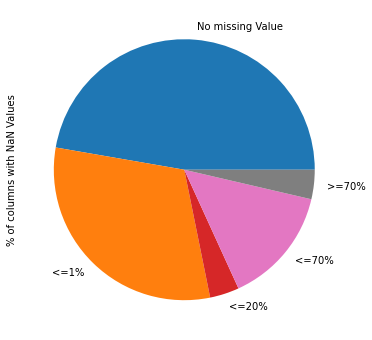

In [9]:
# List to Hold these columns  #### Refactor the Print function
non_missing_list, less_1, less_10, less_20, less_40, less_50, less_70, greater_70 = [],[],[],[],[],[],[],[]
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = round(((no_missing_values/total_no_data_per_column) * 100), 2)
    
    if percentage == 0:
        non_missing_list.append(item)
    if percentage >0 and percentage <= 1:
        less_1.append(item)
    if percentage > 1 and percentage <= 10:
        less_10.append(item)
    if percentage > 10 and percentage <= 20:
        less_20.append(item)
    if percentage > 20 and percentage <= 40:
        less_40.append(item)
    if percentage > 40 and percentage <= 50:
        less_50.append(item)
    if percentage > 50 and percentage <= 70:
        less_70.append(item)
    if percentage > 70:
        greater_70.append(item)

print("Number of columns with No missing Values : ",len(non_missing_list))
print(non_missing_list)
print()
print("Number of columns with missing Values Less than 1%: ",len(less_1))
print(less_1)
print()
print("Number of columns with missing Values Less than 10%: ",len(less_10))
print(less_10)
print()
print("Number of columns with missing Values Less than 20%: ",len(less_20))
print(less_20)
print()
print("Number of columns with missing Values Less than 40%: ",len(less_40))
print(less_40)
print()
print("Number of columns with missing Values Less than 50%: ",len(less_50))
print(less_50)
print()
print("Number of columns with missing Values Less than 70%: ",len(less_70))
print(less_70)
print()
print("Number of columns with missing Values Greater than or eaqual to 70%: ",len(greater_70))
print(greater_70)
print()
# ploting the Missing Data by Groups
print("Ploting the Missing Data by Groups")

series = pd.Series([len(non_missing_list), len(less_1),len(less_10),len(less_20), 
                    len(less_40), len(less_50), len(less_70), 
                    len(greater_70)], 
                   index=["No missing Value","<=1%", "<=10%", "<=20%", "<=40%","<=50%","<=70%",">=70%"], name="% of columns with NaN Values")

series.plot.pie(figsize=(6, 6));

### Droping columns with more than 25-30% missing Values

From Above analytics, these Columns are: 
- 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B'


In [25]:
# Column dropiing function
def drop_column(list_to_be_droped):
    processed_data = loaded_data.drop(list_to_be_droped, 
                      axis=1)
    return processed_data


# Prepare a list of columns to be droped and pass to the Function
list_droped = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
               'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
               'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 6250B < Vol DL < 31250B',
               'Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol UL < 37500B']

processed_data = drop_column(list_droped)
print("Size of Data Left: ",processed_data.shape)
processed_data.head()

Size of Data Left:  (150001, 45)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Filling or Droping Rows of Missing Values

#### Columns to be Considered

In [26]:
# Columns to be Considered
less_1, less_20

(['Bearer Id',
  'IMSI',
  'MSISDN/Number',
  'IMEI',
  'Last Location Name',
  'DL TP < 50 Kbps (%)',
  '50 Kbps < DL TP < 250 Kbps (%)',
  '250 Kbps < DL TP < 1 Mbps (%)',
  'DL TP > 1 Mbps (%)',
  'UL TP < 10 Kbps (%)',
  '10 Kbps < UL TP < 50 Kbps (%)',
  '50 Kbps < UL TP < 300 Kbps (%)',
  'UL TP > 300 Kbps (%)',
  'Handset Manufacturer',
  'Handset Type',
  'Nb of sec with Vol DL < 6250B',
  'Nb of sec with Vol UL < 1250B'],
 ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'])

#### Filling Values in Discrete and Categoric data columns

For Discrete, and Categoric data, I will use Mode Filling method! This will be done because the columns 
are discrete and Categoric, therefore, we'll make assumptions that the missing values are those with 
highest frequency/occurence *******

These columns are ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

In [32]:
# Filling Discrete and Categorical data Columns with Modes

def Mode_filling(data, column_list):
    for column in column_list:
        data[column] = data[column].fillna(data[column].mode()[0])
        
    return data

# Fill 'Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name' columns with mode 
column_list_mode_fill = ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

processed_data = Mode_filling(processed_data, column_list_mode_fill)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

#### Filling Values in Continuous data columns

For Continuous data, I will use k-NN (k nearest neighbours) method to fill missing values! k-NN is chosen to fill missing values, by using close/neighbor related data,and this assumed that, if a number of parameters are almost the same, therefore, these might be doing the same activities on the Internet, for example, streaming videos on youtube or playing games, etc.*******

These columns are ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)']

In [40]:
# Using k-NN Method to fill missing Continuous values for columns shown above

from sklearn.impute import KNNImputer

def knn_fix_missing_value(data, colum_list):
    for column in colum_list:
        imputer = KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean')
        data[column] = imputer.fit_transform(data[[column]])
        
    
    return data


missing_columns = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
                   'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                   '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B', 
                   'Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)']

processed_data = knn_fix_missing_value(processed_data, missing_columns)

processed_data.info()

In [48]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

###  Task 1 Data Exploratory

*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables

For Task1, the following columns will be selected for explorations; 'Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)'.

In [59]:
# Descriptions of the Columns Statistics

processed_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150000.000000,150000.000000,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150000.000000,150000.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500000e+05,1.500000e+05,1.500000e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.015806e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182414e+10,4.842386e+13,109.795706,17.662883,13300.045927,1770.428647,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893178e+18,288.611834,288.097653,8.103762e+04,2.144723e+10,2.438731e+12,2.238859e+13,559.342620,76.529933,23971.878541,4625.355500,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,5.696395e+06,4.643231e+06,8.103761e+07,9148.498009,10133.431600,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365094e+10,3.544691e+13,35.000000,3.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487775e+04,2.153975e+04,5.744079e+07,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366361e+10,3.572151e+13,54.000000,7.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930450e+04,4.679350e+04,8.639998e+07,205.000000,220.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368307e+10,8.611970e+13,109.795706,17.662883,19710.750000,1120.000000,100.000000,4.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,6.796095e+05,5.990952e+05,1.324308e+08,2765.000000,2560.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454

In [56]:
# Plot functionsto show outliers and abnomalities

################### PLOTTING FUNCTIONS #####################

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()
def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


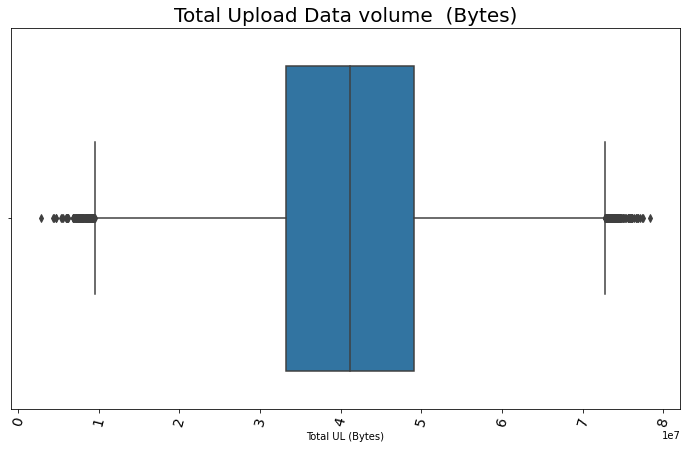

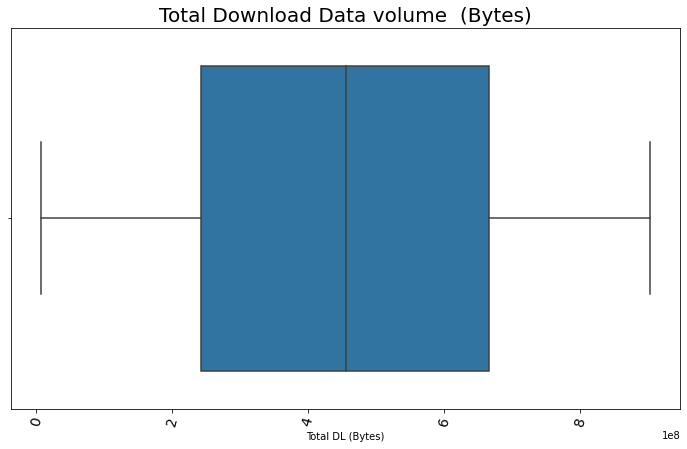

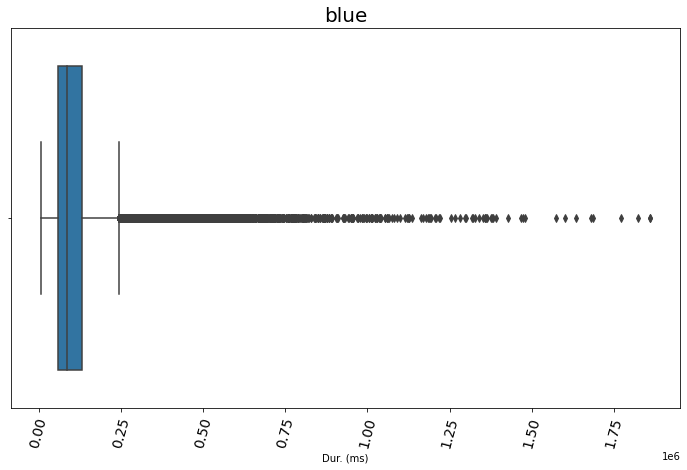

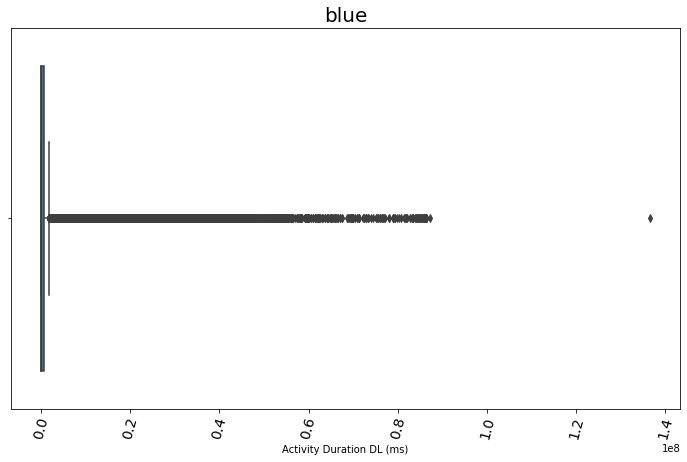

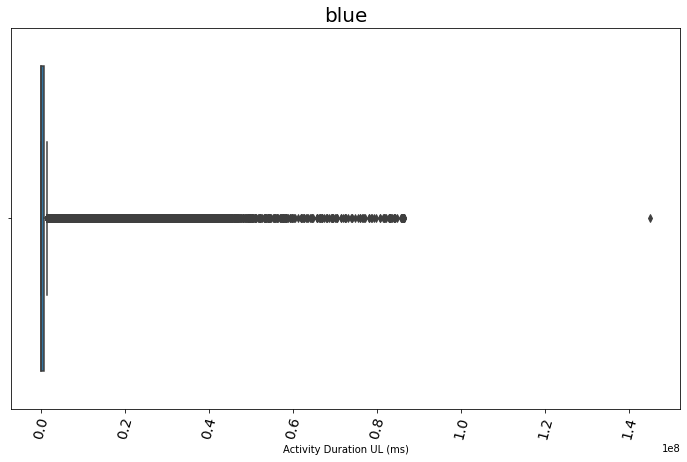

In [58]:
plot_box(processed_data, "Total UL (Bytes)", "Total Upload Data volume  (Bytes)")
plot_box(processed_data, "Total DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Dur. (ms)", "blue")
plot_box(processed_data, "Activity Duration DL (ms)", "blue")
plot_box(processed_data, "Activity Duration UL (ms)", "blue")

In [55]:
processed_data["Activity Duration UL (ms)"].describe()
processed_data["Activity Duration DL (ms)"].describe()

count    1.500000e+05
mean     1.829177e+06
std      5.696395e+06
min      0.000000e+00
25%      1.487775e+04
50%      3.930450e+04
75%      6.796095e+05
max      1.365365e+08
Name: Activity Duration DL (ms), dtype: float64

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.


In [31]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
975,494.28
314,123.75
591,122.97
840,193.61
1744,263.63


In [32]:
original_data[0].min(), original_data[0].max()

(0.09952282828343637, 1612.144380953509)

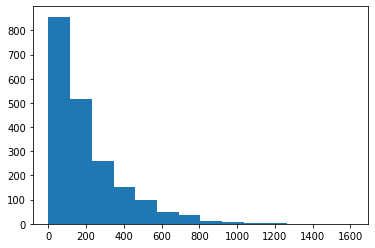

In [33]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

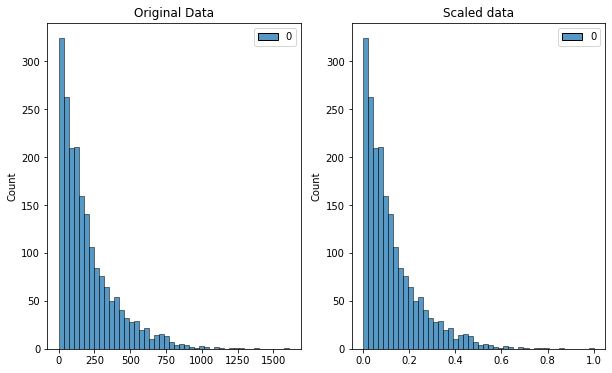

In [91]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

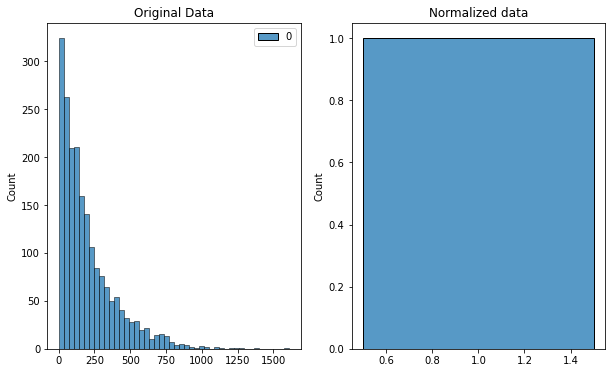

In [92]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [94]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [143]:
def fix_age(col):
    weight = [ x.replace( '[', '' ).replace( ')', '' ) for x in col.fillna('') ]
    new_age = [ ( ( int(i.split('-')[0] ) + int( i.split('-')[1] ) ) / 2)  for i in weight ]
    return weight, new_age

df['age_group'], df_clean['fix_age'] = fix_weight(df_clean['age'])

AttributeError: 'float' object has no attribute 'replace'

In [132]:

df_clean['diag_1'] = pd.to_numeric(df_clean['diag_1'], errors='coerce')
df_clean['diag_2'] = pd.to_numeric(df_clean['diag_2'], errors='coerce')
df_clean['diag_3'] = pd.to_numeric(df_clean['diag_3'], errors='coerce')


In [134]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_lab_procedures        101766 non-null  int64  
 10  num_procedures            101766 non-null  int64  
 11  num_medications           101766 non-null  int64  
 12  number_outpatient         101766 non-null  int64  
 13  number_emergency          101766 non-null  i

In [135]:
df_clean['fix_age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [142]:
   
df_clean['age'] = [ ((int(i.split('-')[0]) + int(i.split('-')[1])) / 2)  for i in df_clean['fix_age']]

## Utility Functions

In [93]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

## Extracting Data

In [47]:
db['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [88]:
percent_missing(df_clean)

The Diabetes dataset contains 0.0 % missing values.


In [144]:
missing_values_table(df_clean)

Your selected dataframe has 46 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
diag_3,5131,5.00,float64
diag_2,2538,2.50,float64
diag_1,1645,1.60,float64


In [145]:
def map_readmitted(col):
    readmitted_map = {'NO' : 'NO', '>30': 'YES', '<30': 'YES'}
    return col.map(readmitted_map)

db['fix_readmitted'] = map_readmitted(db['readmitted'])

In [71]:
# unique encounter id
db['change'].unique()

array(['No', 'Ch'], dtype=object)

In [50]:
db.shape

(101766, 50)

In [ ]:
pd.set_option('max_column', None)
df = pd.read_excel("data/Week2_challenge_data_source.xlsx", engine = 'openpyxl')
df.head()